
# Computing the transfer function of MUX and AMP SQUIDs
## (SQUID MUX19a Type 3)

## Laurent @IRAP

----

* Created 30/09/2021
* Modified 13/01/2023
    * Notebook updated to export the transfer functions to ascii files

This Notebook computes the characteristic of a MUX SQUID. The characteristic is plotted and exported to a text file.

----


In [41]:
###################################################
# imports
###################################################

import numpy as np
import matplotlib.pyplot as plt

In [42]:
###################################################
# decimal to hexa 
###################################################

def dec_to_signed_hexa(signeddec,nbits,ox=True):
    r"""
    This function returns the hexadecimal string of a signed decimal value.
    
    Parameters
    ----------
    signeddec : decimal
        The decimal value to be converted
    nbits : number
        The number of bits of the data

    Output
    ------
    value : string
        The converted value

    Examples
    --------
    >>> dec_to_signed_hexa(2,8)                                                           
    '0x2'
    >>> dec_to_signed_hexa(2,16)                                                          
    '0x2'
    >>> dec_to_signed_hexa(2,16,ox=False)                                                          
    '2'
    >>> dec_to_signed_hexa(-2,16)                                                         
    '0xfffe'
    """

    strout = hex(signeddec & (2**nbits-1))
    if not ox:
        strout = strout[2:]
    return(strout)


In [43]:
def dicotom(func, y, x1, x2, deltamax=1e-14, nitermax=1000):
    if ( func(x1) > y and func(x2) > y ) or ( func(x1) < y and func(x2) < y ):
        print('Erreur ! Mauvaise gamme de départ.')
        print(y, x1, x2)
        return(0)
    else:
        niter=0
        delta=abs(y-func(x1))
        while (niter < nitermax and delta > deltamax):
            x3 = (x1+x2)/2
            y3, y1, y2=func(x3), func(x1), func(x2)
            if y1 < y and y < y3:
                x2 = x3
            else :
                x1 = x3
            niter+=1
            delta=y-func(x1)
        return(y, x1, func(x1), delta, niter)

In [44]:
###################################################
# MUX SQUID tranfer function (SQUID MUX19a Type 3)
###################################################

def mux_squid(npts, full_scale=True, nbits=16):        
    
    a=np.array([2.40329e-06, 9.54011e-06])
    p=np.array([6.299441, -0.94834025, 0.39483974])

    x=np.arange(npts)/npts
    y = (a[0]*np.sin(p[0]*(x+p[1])+p[2]*np.sin(p[0]*(x+p[1])))+a[1])*1e6

    if full_scale:
        y = (y-y.min())*(2**nbits-1)/(y.max()-y.min())
    return (x, y)


In [45]:
###################################################
# Doing plot
###################################################

def plot_tf(x, tf, title, plot_file_name):
    
    fig=plt.figure(figsize=(11,7))
    ax1=fig.add_subplot(1,1,1)

    ax1.plot(x, tf, color='b', linewidth=5, label='Single period')
    ax1.plot(x+1, tf,'--', color='b', linewidth=2, label='Full characteristic')
    ax1.set_xlabel('SQUID flux ($\Phi_0$)')
    ax1.set_ylabel('SQUID output ($\mu V$)')
    ax1.set_xlim(0,2)
    ax1.set_title(title, color='blue')
    ax2 = ax1.twiny()
    ax2.set_xlim(0, 2*len(x))
    ax2.set_xlabel("Memory addresses")
    ax1.legend(loc='best')
    ax1.title.set_weight('bold')
    ax1.title.set_fontsize(16)
    for item in ([ax1.xaxis.label, ax1.yaxis.label, ax2.xaxis.label]):
        item.set_weight('bold')
        item.set_fontsize(12)
    for item in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels()):
        item.set_fontsize(12)
    ax1.grid()
    fig.tight_layout()

    plt.savefig(plot_file_name, dpi=300, bbox_inches='tight')


In [46]:
###################################################
# Printing to a file
###################################################

def tf_to_file(tf, word_length_in_bits, file_name):
    f = open(file_name, 'w')
    for i in range(len(tf)):
        line = dec_to_signed_hexa(int(tf[i]), word_length_in_bits, ox=False)+"\n"
        #line = "{0:5d}\n".format(MUX_SQUID(x[iline],word_length_in_bits))
        f.write(line)
    f.close()

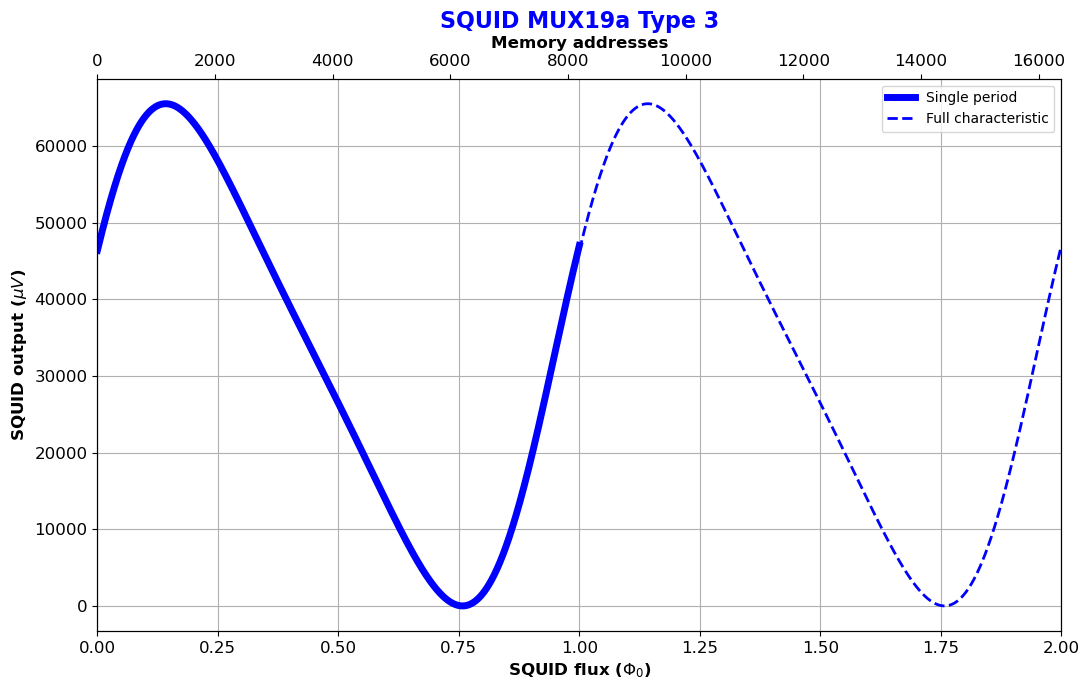

In [47]:
###################################################
# Making transfer functions
###################################################

############
# MUX SQUID
############
npts=2**13
word_length_in_bits = 16
x_mux_sq, tf_mux_sq = mux_squid(npts, full_scale=True, nbits=word_length_in_bits)
x_triangle_mux_sq, tf_triangle_mux_sq = triangle_squid(npts, nbits=word_length_in_bits) # for tests

# Exporting MUX SQUID transfer functions to a file
nom_fichier = "mux_squid_tf.txt"
tf_to_file(tf_mux_sq, word_length_in_bits, nom_fichier)
nom_fichier = "triangle_mux_squid_tf.txt"
tf_to_file(tf_triangle_mux_sq, word_length_in_bits, nom_fichier)


############
# AMP SQUID
############
npts=2**14
word_length_in_bits = 16
x_amp_sq, tf_amp_sq = mux_squid(npts, full_scale=True, nbits=word_length_in_bits)
x_triangle_amp_sq, tf_triangle_amp_sq = triangle_squid(npts, nbits=word_length_in_bits) # for tests

# Exporting AMP SQUID transfer functions to a file
nom_fichier = "amp_squid_tf.txt"
tf_to_file(tf_amp_sq, word_length_in_bits, nom_fichier)
nom_fichier = "triangle_amp_squid_tf.txt"
tf_to_file(tf_triangle_amp_sq, word_length_in_bits, nom_fichier)


#############################
# Plotting transfer function
#############################
plot_tf(x_mux_sq, tf_mux_sq, "SQUID MUX19a Type 3", "mux_squid.png")